In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
from scipy.constants import physical_constants
from ipywidgets import interact

In [2]:
h_bar = physical_constants['Planck constant over 2 pi'][0]
m_el = physical_constants['electron mass'][0]
eV_unit = physical_constants['electron volt'][0]

In [3]:
a = 1.0 * 10 ** (-9)
a_nm = a * 10**(9)
N = 36
L = (N + 1) * a

t_J = (h_bar ** 2)/(2 * m_el * a * a)
t = t_J / eV_unit

print("t = ", t)
print("L = ", L)

t =  0.03809981988649954
L =  3.7e-08


In [4]:
sys = kwant.Builder()
lat = kwant.lattice.square(a_nm)

In [5]:
def gaus(x, y, x0 = 0, y0 = 0, Ub=1, sigma=1):
    r2 = (x - x0)**2 + (y - y0)**2
    return Ub * np.exp(-r2 / (2 * sigma**2))

def onsite(site, Ub = 1, sigma = 1):
    (x, y) = site.pos
    V_gauss = gaus(x, y, x0 = 0, y0 = 0, Ub = Ub, sigma = sigma)
    return 4 * t + V_gauss
        
def shape_circle(pos):
    x, y = pos
    if(x**2 + y**2 < N**2):
        return True
    else:
        return False
    
sys[lat.shape(shape_circle, (0,0))] = lambda site: onsite(site, Ub = 1, sigma = 1)
sys[lat.neighbors()] = -t

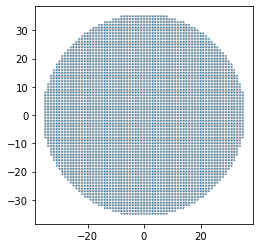

In [6]:
kwant.plot(sys);

In [7]:
sysf = sys.finalized()

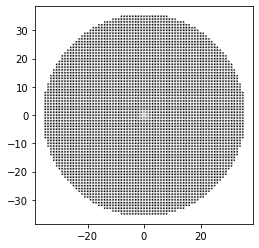

In [8]:
kwant.plot(sysf, site_color = lambda site: sysf.hamiltonian(site, site), colorbar = False);

In [9]:
ham = sysf.hamiltonian_submatrix()

In [10]:
print(ham)

[[ 0.15239928+0.j -0.03809982-0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.03809982+0.j  0.15239928+0.j -0.03809982-0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.03809982+0.j  0.15239928+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.15239928+0.j
  -0.03809982-0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ... -0.03809982+0.j
   0.15239928+0.j -0.03809982-0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
  -0.03809982+0.j  0.15239928+0.j]]


In [11]:
ene, v = np.linalg.eigh(ham)

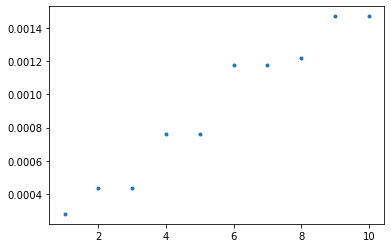

In [12]:
ntab  = np.arange(1, N  + 1)
plt.plot(ntab[:10], ene[:10], ".");

In [13]:
def plot_wf(i=1, Ub=1, sigma=1):
    sys[lat.shape(shape_circle, (0, 0))] = lambda site: onsite(site, Ub=Ub, sigma=sigma)
    sysf = sys.finalized()
    ham = sysf.hamiltonian_submatrix()
    ene, v = np.linalg.eigh(ham)
    xtab = np.arange(1, len(v[:, i-1]) + 1)
    print("E = ", ene[i-1])
    kwant.plotter.map(sysf, abs(v[:, i-1])**2)
    plt.plot(xtab, abs(v[:, i-1])**2, ".")

In [ ]:
interact(plot_wf, i=(1, 10), Ub=(-1, 1, 0.1), sigma=(0.1, 5, 0.1))

interactive(children=(IntSlider(value=1, description='i', max=10, min=1), FloatSlider(value=1.0, description='…

1. Dla  Ub > 0 : Potencjał Gaussa ma najwyższą wartość w centrum układu, działając jako potencjał odpychający. Może to wypychać niektóre stany z centrum, co wpłynie na ich rozmieszczenie przestrzenne w gęstości prawdopodobieństwa.

2. Dla  Ub < 0 : Potencjał działa przyciągająco do centrum układu. To może przyciągać pewne stany do centrum, prowadząc do lokalizacji ich gęstości prawdopodobieństwa w pobliżu środka.

3. Zmiana szerokości potencjału Gaussa wpływa na zasięg jego oddziaływania. Przy większym  sigma  potencjał jest szerszy, wpływając na więcej punktów siatki, co może wpłynąć na większy obszar stanów w układzie.
    
4. Degeneracja energii
Degeneracja stanów własnych ujawnia się gdy układ ma symetrię. 
Środek potencjału w środku układu( x0 = 0  i  y0 = 0 ) zwiększa szanse na degenerację.
Przy mniejszych wartościach sigma  potencjał Gaussa będzie działać bardziej lokalnie, działając tylko na kilka centralnych punktów. Przy odpowiednio małym Ub nie zaburzy w dużym stopmiu stanów własnych.

5. Brak degeneracji energii
Aby usunąć degenerację, należy zmniejszyć symetrię układu.
Przesunięcie środka potencjału Gaussa w inne miejsce niż środek układu (x0 = 10 , y0 = 10) łamie symetrię przestrzenną, co prowadzi do rozbicia degeneracji.
Zwiększenie szerokości potencjału Gaussa (sigma = 5) wpływa na większy obszar w siatce, wprowadzając dodatkowe zaburzenia dla stanów, które wcześniej były zdegenerowane.
Wybór większego  Ub  (Ub = 1  lub  Ub = -1) może spowodować, że stany o różnych symetriach będą miały różne energie, co prowadzi do zniesienia degeneracji.

In [ ]:
def gaus(x, y, x0 = 10, y0 = 10, Ub=0.5, sigma=1):
    r2 = (x - x0)**2 + (y - y0)**2
    return Ub * np.exp(-r2 / (2 * sigma**2))

def onsite(site, Ub = 0.5, sigma = 1):
    (x, y) = site.pos
    V_gauss = gaus(x, y, x0 = 10, y0 = 10, Ub = Ub, sigma = sigma)
    return 4 * t + V_gauss
        
def shape_circle(pos):
    x, y = pos
    if(x**2 + y**2 < N**2):
        return True
    else:
        return False
    
sys[lat.shape(shape_circle, (0,0))] = lambda site: onsite(site, Ub = 0.5, sigma = 1)
sys[lat.neighbors()] = -t

In [ ]:
kwant.plot(sys);

In [ ]:
sysf = sys.finalized()

In [ ]:
kwant.plot(sysf, site_color = lambda site: sysf.hamiltonian(site, site), colorbar = False);

In [ ]:
ham = sysf.hamiltonian_submatrix()

In [ ]:
print(ham)

In [ ]:
ene, v = np.linalg.eigh(ham)

In [ ]:
ntab  = np.arange(1, N  + 1)
plt.plot(ntab[:10], ene[:10], ".");

In [ ]:
def plot_wf(i=1, Ub=0.5, sigma=1):
    sys[lat.shape(shape_circle, (0, 0))] = lambda site: onsite(site, Ub=Ub, sigma=sigma)
    sysf = sys.finalized()
    ham = sysf.hamiltonian_submatrix()
    ene, v = np.linalg.eigh(ham)
    xtab = np.arange(1, len(v[:, i-1]) + 1)
    print("E = ", ene[i-1])
    kwant.plotter.map(sysf, abs(v[:, i-1])**2)
    plt.plot(xtab, abs(v[:, i-1])**2, ".")

In [ ]:
interact(plot_wf, i=(1, 10), Ub=(-1, 1, 0.1), sigma=(0.1, 5, 0.1))

Ub > 0
Ub = 0.5
x0 = 10
y0 = 10

sigma = 1
Potencjał Gaussa ma wąski zasięg. Niewielki wpływ na stany własne w całym układzie. Minimalne rozbicie degeneracji

sigma = 5

Potencjał Gaussa ma globalny zasięg. Wpływa na większą liczbę stanów własnych. co prowadzi do znaczącego rozbicia degeneracji. 